In [1]:
# Car Model Prediction

In [107]:
from src.SVM import SVM
from src.Softmax import Softmax
from src.train import train, test
from src.utils import show_images, load_test_images, load_train_images, get_acc
from src.reader import ImageFolderWithPaths, TrainSet, TestSet

import torch
import torch.nn as nn
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# %load_ext autoreload
# %autoreload 2

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f'\n{device} will be used as device')


cuda:0 will be used as device
[autoreload of src.Softmax failed: Traceback (most recent call last):
  File "C:\Users\okori\AppData\Roaming\Python\Python39\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\okori\AppData\Roaming\Python\Python39\site-packages\IPython\extensions\autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "C:\Users\okori\AppData\Roaming\Python\Python39\site-packages\IPython\extensions\autoreload.py", line 347, in update_generic
    update(a, b)
  File "C:\Users\okori\AppData\Roaming\Python\Python39\site-packages\IPython\extensions\autoreload.py", line 302, in update_class
    if update_generic(old_obj, new_obj): continue
  File "C:\Users\okori\AppData\Roaming\Python\Python39\site-packages\IPython\extensions\autoreload.py", line 347, in update_generic
    update(a, b)
  File "C:\Users\okori\AppData\Roaming\Python\Python39\site-packages\IPython\extensions

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

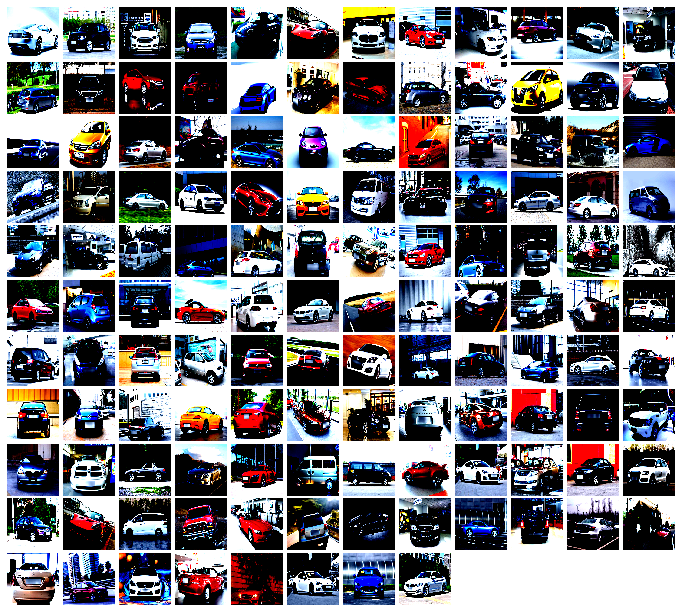

In [100]:
# Load data and display

root = 'data/data'
scale_size = 224

train_data_list = load_train_images(root + '/train_test_split/verification/verification_train.txt')
test_data_list = load_test_images(root + '/train_test_split/verification/verification_pairs_easy.txt')

transform = transforms.Compose([
   transforms.Resize((scale_size, scale_size)),
   transforms.ToTensor(),
   transforms.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225])
])

train_data = TrainSet(root + '/image', train_data_list, device, transform)
test_data = TestSet(root + '/image', test_data_list, device, transform)

batch_size = 128

train_loader = DataLoader(train_data, batch_size=batch_size, drop_last=True, shuffle=True)
val_loader = None
test_loader = DataLoader(test_data, batch_size=batch_size, drop_last=True, shuffle=True)


# imgs = train_loader.__iter__().next()[1].numpy().squeeze()
imgs = train_loader.__iter__().next()[1].numpy().squeeze()
show_images(imgs, color=True)

In [87]:
#SVM
# print(train_data[0])
# imgs = train_data[batch_size][1].numpy().squeeze()
# print(imgs.shape)
# show_images(imgs, color=True)

(tensor([[1.0464e+00, 2.1606e+00, 2.2928e+00, 6.3829e-01, 2.2572e+00, 8.4099e-01,
         1.3901e+00, 3.7134e-01, 5.8023e-01, 7.5222e-01, 2.7278e-01, 2.3978e-01,
         2.4410e-01, 5.3883e-01, 1.6045e-01, 1.6481e-01, 1.5958e+00, 1.2008e+00,
         3.8869e-01, 6.3620e-02, 3.0725e-01, 1.7872e+00, 3.6763e-01, 3.4354e-01,
         1.0738e-01, 1.1501e+00, 7.9284e-01, 3.1837e+00, 1.4531e-01, 4.9566e-01,
         4.9732e-01, 3.7594e-01, 3.1239e+00, 1.1681e+00, 2.1634e-01, 5.2319e-02,
         6.8119e-02, 1.5806e+00, 9.5747e-01, 4.5600e-01, 6.5943e-01, 2.3893e-01,
         2.2364e-01, 4.4401e-01, 2.4672e-01, 4.4628e-02, 1.6389e+00, 1.2874e-02,
         2.2216e-02, 6.6272e-01, 6.3260e-01, 1.3146e-03, 1.3586e+00, 3.2105e-01,
         9.6500e-01, 3.0361e-03, 5.1696e-01, 9.3502e-02, 3.8135e-01, 1.5009e-01,
         3.0845e-01, 1.9599e-02, 6.3222e-01, 2.7472e-01, 9.0807e-01, 1.0202e-01,
         1.9203e-01, 3.8817e-01, 9.5982e-01, 7.6192e-01, 2.3093e-01, 6.3613e-01,
         1.8557e-01, 7.5085

IndexError: tuple index out of range

In [103]:
learning_rate = 0.001
epochs = 50
n_class = 2
rc = 0.1

model = SVM(n_class, learning_rate, epochs, rc).to(device)
# optim = torch.optim.Adam(model.parameters(), lr=learning_rate, betas = (0.5, 0.999))

# train
svm_losses = train(model, device=device, loader=train_loader)

dataset size: (2176, 200)
Accuracy is given by: 52.159926


In [102]:
# Prediction
test(model, test_loader, device)




ModuleAttributeError: 'SVM' object has no attribute 'test'

In [ ]:
# plot error

plt.figure(figsize=(10,5))
plt.title("Loss During Training")
plt.plot(svm_losses)
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.show()

In [ ]:
loss, acc = validate(test_loader)
print(f'SVM test accuracy is: {acc}')

In [4]:
# Classifier

In [112]:
learning_rate = 0.01
epochs = 100
n_class = 2
rc = 0.1

model = Softmax(n_class, learning_rate, epochs, rc).to(device)

# train
classifier_losses = train(model, device=device, loader=train_loader)

dataset size: (2176, 200)
Accuracy is given by: 73.391544


In [ ]:
# plot error

plt.figure(figsize=(10,5))
plt.title("Loss During Training")
plt.plot(classifier_losses)
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.show()

In [ ]:
loss, acc = validate(test_loader)
print(f'Classifier test accuracy is: {acc}')